<a href="https://colab.research.google.com/github/BatuhanBulcum/Konut_Analizi/blob/main/Konut_analizi_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ABD de online emlak şirketlerinin konut özellikleri ve satışına dair veriler bulunmaktadır.

Amaç verilerin detaylı analizi ve fiyat tahmini yapmaktır.

İbrahim Batuhan Bulçum

Gerekli olan kütüphaneleri yükleyelim.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Veriyi okutalım.

In [ ]:
data = pd.read_csv('file:///C:/Users/Batuhan/Desktop/kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Veri boyutlarına bakalım.

In [ ]:
data.shape

(21597, 21)

21597 satır 21 sütundan oluşan bir tablomuz var.

Verimizin içerdiği kolonları inceleyelim.

In [ ]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Verimizde bulunan sayısal değerleri inceleyelim.

In [ ]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Kullanmayacağımız kolonları silelim.

In [ ]:
del data['sqft_living15']
del data['sqft_lot15']

In [ ]:
data.shape

(21597, 19)

NaN değerlerin varlığını inceleyelim.

In [ ]:
data.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
dtype: bool

Verimizin içinde NaN değerleri yoktur.

Veri türlerimizi kontrol edelim.

In [ ]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
dtype: object

Endeks olarak "id" sütununu belirleyelim. Böylece id numarasını girerek aradığımız konuta ulaşabiliriz.

In [ ]:
data = data.set_index('id')
data.index

Int64Index([7129300520, 6414100192, 5631500400, 2487200875, 1954400510,
            7237550310, 1321400060, 2008000270, 2414600126, 3793500160,
            ...
            7852140040, 9834201367, 3448900210, 7936000429, 2997800021,
             263000018, 6600060120, 1523300141,  291310100, 1523300157],
           dtype='int64', name='id', length=21597)

6414100192 id numaralı konutu inceleyelim.

In [ ]:
data.loc[6414100192]

date             12/9/2014
price               538000
bedrooms                 3
bathrooms             2.25
sqft_living           2570
sqft_lot              7242
floors                   2
waterfront               0
view                     0
condition                3
grade                    7
sqft_above            2170
sqft_basement          400
yr_built              1951
yr_renovated          1991
zipcode              98125
lat                 47.721
long              -122.319
Name: 6414100192, dtype: object

Zip kodunun türü tam sayı ise başa sıfır gelebileceği için string olmasında fayda var.

In [ ]:
data.dtypes[['zipcode']]

zipcode    int64
dtype: object

In [ ]:
def sayidanMetin(sayi):
  return str(sayi)
data.zipcode = data.zipcode.apply(sayidanMetin)

Şimdi id sini girip zip koduna ulaşalım.

In [ ]:
data.zipcode[6414100192]

'98125'

Şimdi fiyatları low mid ve high olacak şekilde kategorizasyon işlemleri yapalım.

Bunun için öncelikle verinin dağılımına bakalım.

In [ ]:
data['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Kategori sınırlarını eşit aralıklı tanımlayalalım. 
Max-min arasında birbirinden eşit uzaklıkta kategori sayisindan bir fazla değer oluşturalım.

In [ ]:
bins = np.linspace(data['price'].min(), data['price'].max(),4)
print(bins)

[  78000.         2618666.66666667 5159333.33333333 7700000.        ]


Yeni bir kolon yaratıp bu kategorik verileri oluşturup yerleştirelim.

In [ ]:
kategoriler = ['low','mid','high']
data['price-category'] = pd.cut(data['price'], bins, labels = kategoriler, include_lowest = True)

Oluşturduğumuz kolonu inceleyelim.

In [ ]:
data[['price','price-category']]

,price,price-category
id,,
7129300520,221900.0,low
6414100192,538000.0,low
5631500400,180000.0,low
2487200875,604000.0,low
1954400510,510000.0,low
...,...,...
263000018,360000.0,low
6600060120,400000.0,low
1523300141,402101.0,low


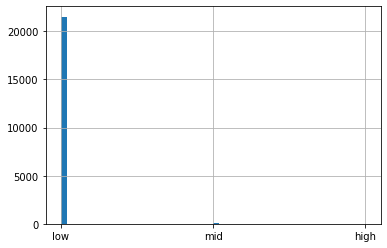

In [ ]:
data['price-category'].hist(bins=50)

Tarihleri pandas datetime formatına dönüştürelim. Böylece satış tarihlerine göre sıralayabiliriz.

In [ ]:
data.date = data.date.apply(pd.to_datetime)
data.loc[:,['date']]

,date
id,
7129300520,2014-10-13
6414100192,2014-12-09
5631500400,2015-02-25
2487200875,2014-12-09
1954400510,2015-02-18
...,...
263000018,2014-05-21
6600060120,2015-02-23
1523300141,2014-06-23


In [ ]:
data.sort_values(by = 'date')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,price-category
id,,,,,,,,,,,,,,,,,,,
2202500290,2014-05-02,435000.0,4,1.00,1450,8800,1.0,0,0,4,7,1450,0,1954,0,98006,47.5746,-122.135,low
7853361370,2014-05-02,555000.0,4,2.50,3310,6500,2.0,0,0,3,8,3310,0,2012,0,98065,47.5150,-121.870,low
7197300105,2014-05-02,550000.0,4,2.50,1940,10500,1.0,0,0,4,7,1140,800,1976,0,98052,47.6830,-122.114,low
3438501320,2014-05-02,295000.0,2,2.50,1630,1368,2.0,0,0,3,7,1280,350,2009,0,98106,47.5489,-122.363,low
472000620,2014-05-02,790000.0,3,2.50,2600,4750,1.0,0,0,4,9,1700,900,1951,0,98117,47.6833,-122.400,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8149600265,2015-05-14,725000.0,4,1.75,1980,5850,1.0,0,1,4,8,1380,600,1960,0,98116,47.5607,-122.391,low
4166600610,2015-05-14,335000.0,3,2.00,1410,44866,1.0,0,0,4,7,1410,0,1985,0,98023,47.3273,-122.370,low
7923600250,2015-05-15,450000.0,5,2.00,1870,7344,1.5,0,0,3,7,1870,0,1960,0,98007,47.5951,-122.144,low


Şimdi genel bir analiz yapalım.

Konutların durumuna göre bir analiz yapalım.
1 -> En kötü durumda olan(yıpranmış)
.
.
5 -> En iyi durumda olan(mükemmel)

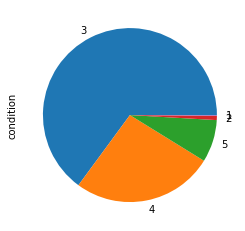

In [ ]:
data.condition = data.condition.astype('category')
data.dtypes['condition']
data["condition"].value_counts().plot.pie()

3 ve 4 ' ün fazla olduğunu görüyoruz buda konutların orta ve üstü durumlarda olduğunu gösteriyor.

Durumu "5" (mükemmel) olarak belirtilmiş olanları görelim.

In [ ]:
durumlar = data[data['condition']==5]
durumlar.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,price-category
id,,,,,,,,,,,,,,,,,,,
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,low
1202000200,2014-11-03,233000.0,3,2.00,1710,4697,1.5,0,0,5,6,1710,0,1941,0,98002,47.3048,-122.218,low
3303700376,2014-12-01,667000.0,3,1.00,1400,1581,1.5,0,0,5,8,1400,0,1909,0,98112,47.6221,-122.314,low
822039084,2015-03-11,1350000.0,3,2.50,2753,65005,1.0,1,2,5,9,2165,588,1953,0,98070,47.4041,-122.451,low
5072410070,2014-10-21,505000.0,3,1.75,2519,8690,2.0,0,0,5,8,2519,0,1973,0,98166,47.4428,-122.344,low


Konut durumu kategorik verisini, kategorileri sıralı olacak şekilde değiştirelim.(kötüden-iyiye)

In [ ]:
data["condition"].cat.as_ordered(inplace = True)
print("min:",data["condition"].min(),", max:",data["condition"].max())

min: 1 , max: 5


Konutlara verilen notlara göre bir analiz yapalım.

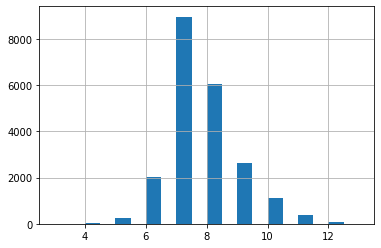

In [ ]:
data['grade'].hist(bins=20)

Konut notları 7-8 arasında yoğundur. 

Konutların havuzları olup olmasına göre inceleyelim. 
0 -> yok
1 -> var

In [ ]:
data["waterfront"].value_counts()

0    21434
1      163
Name: waterfront, dtype: int64

Yenilenen evlere bakalım.

In [ ]:
yenilenenler = data
yenilenenler = yenilenenler[data['yr_renovated'] > 1]#0 olanlar yenilenme işlemi görmediği için 1'den büyükleri aldım.
yenilenenler.yr_renovated

id
6414100192    1991
9547205180    2002
1483300570    1991
2450000295    2010
3626039325    1999
              ... 
7351200295    1960
126039256     2006
4305600360    2009
3319500628    2014
1278000210    2007
Name: yr_renovated, Length: 914, dtype: int64

In [ ]:
data["yr_renovated"].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

En çok 2014 yılında konut yenileme işlemi yapılmıştır.

Genel olarak verilerin dağılımını inceleyelim.

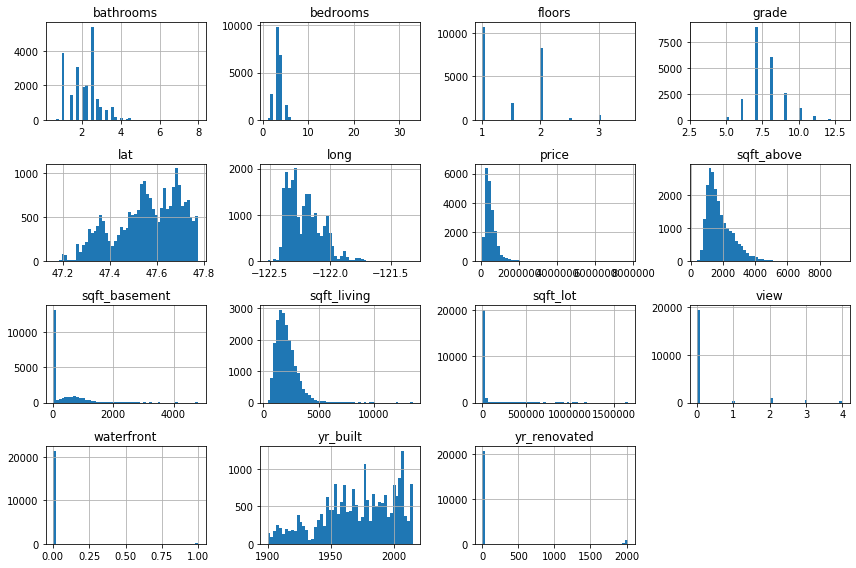

In [ ]:
data.hist(bins=50, xlabelsize = 10, ylabelsize = 10)
plt.tight_layout(rect=(0, 0, 2, 2))

Verilerin birbirleri ile olan ilişkisini inceleyelim.(Fiyat tahmininde bu özelliklerden faydalanacağız.)

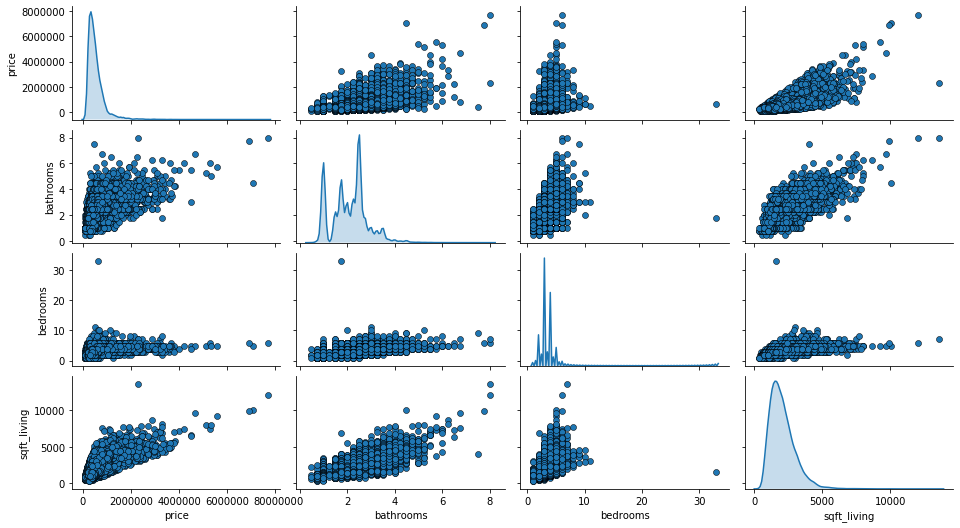

In [ ]:
ozellikler = ['price','bathrooms','bedrooms','sqft_living']
pp = sns.pairplot(data[ozellikler], height=1.8, aspect=1.8,plot_kws=dict(edgecolor="k", linewidth=0.5),diag_kind="kde", diag_kws=dict(shade=True))

Veriler büyük oranda diyagonal üzerinde, bir özellikteki artış diğer özellikte de artışa karşılık geliyor. 

Konuta verilen notla fiyatın ilişkisine bakalım.

Text(0.5, 1.0, 'Bar plot: grade')

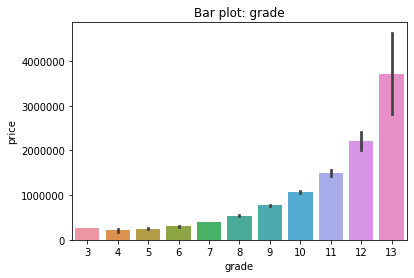

In [ ]:
sns.barplot(x="grade", y="price", data=data)
plt.title("Bar plot: grade")

Verilen not arttıkça konut fiyatıda fazla oluyor.

Konutun durumu ile fiyatın ilişkisine bakalım.

Text(0.5, 1.0, 'Bar plot: condition-price')

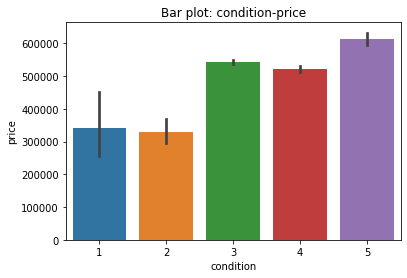

In [ ]:
sns.barplot(x="condition", y="price", data=data)
plt.title("Bar plot: condition-price")

Genel anlamda durumu daha iyi olanın fiyatıda fazla oluyor.

Metrekare ile fiyat ilişkisine bakalım.

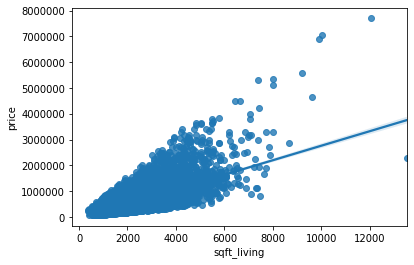

In [ ]:
sns.regplot(x='sqft_living',y='price',data=data)

Bulunan eğri pozitif yani korelasyon pozitif, konutun sahip olduğu metrekare artarken, fiyat da artıyor.

Konutun sahip olduğu banyo sayısı ile fiyat ilişkisine bakalım.

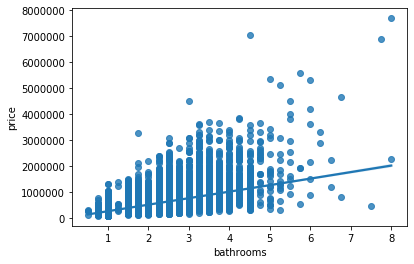

In [ ]:
sns.regplot(x='bathrooms',y='price',data=data)

Korelasyon pozitif, konutun sahip olduğu banyo sayısı artarken, fiyat da artıyor.

Konutun sahip olduğu yatak odası sayısı ile fiyat ilişkisine bakalım.

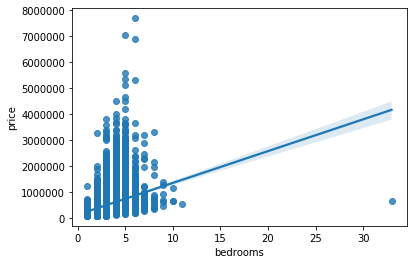

In [ ]:
sns.regplot(x='bedrooms',y='price',data=data)

Korelasyon pozitif, konutun sahip olduğu yatak odası sayısı artarken, fiyat da artıyor.

Bütün özelliklerin birbiri ile olan ilişkisini inceleyelim.

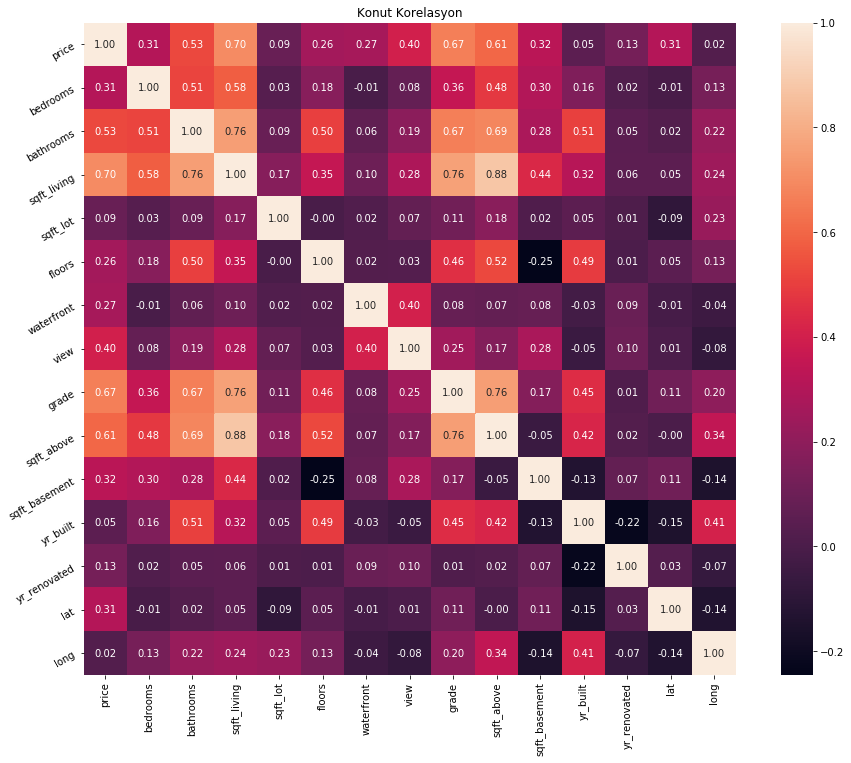

In [ ]:
corr = data.corr()
plt.figure(figsize=(16, 12))
plt.title('Konut Korelasyon')
ax = sns.heatmap(corr,square=True ,annot=True,fmt ='.2f',linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);
ax.set_yticklabels(ax.get_yticklabels(),rotation=30);

Fiyat ile metrekare , konut notu , yatak odası sayısı, banyo sayısı özellikleri arasındaki korelasyon pozitiftir.

Özellikler ile fiyat arasındaki ilişkiyi modelleyelim.

Doğrusal modelleme için kütüphaneyi yükleyelim, obje oluşturalım ve kullanılacak özellikleri ekleyelim.

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
ozellikler = data[['sqft_living','grade','bathrooms','bedrooms']]
lr.fit(ozellikler,data['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("Kurulan model:")
print(' fiyat = ',lr.intercept_, ' + ',lr.coef_[0], ' * sqft_living',
     ' + ',lr.coef_[1], ' * grade',
     ' + ',lr.coef_[2], ' * bathrooms',
     ' + ',lr.coef_[2], ' * bedrooms'
     ) 

Kurulan model:
 fiyat =  -481267.69636011764  +  226.9303667710102  * sqft_living  +  96738.19269068194  * grade  +  -27216.3943936719  * bathrooms  +  -27216.3943936719  * bedrooms


Verimizin ilk 5 satırındaki özellikleri ve modeli kullanarak fiyatı tahmin edelim.

In [ ]:
kestirilen_fiyatlar = lr.predict(ozellikler[:5])
print('Kestirilen fiyatlar: ',np.round(kestirilen_fiyatlar))
print('Gerçek değerler: ', np.array(data['price'])[:5])

Kestirilen fiyatlar:  [317507. 598920. 167379. 400429. 500494.]
Gerçek değerler:  [221900. 538000. 180000. 604000. 510000.]


Kestirimlerimiz ile gerçek değer arasındaki farkı inceleyelim. Bunun için residual-plot yöntemini kullanalım.

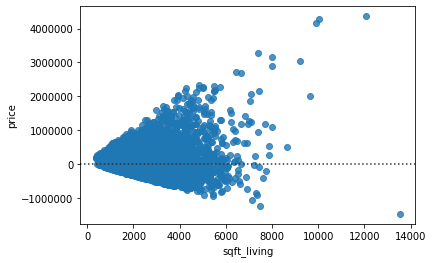

In [ ]:
sns.residplot(data['sqft_living'],data['price'])

Konut metrekaresi arttıkça hata da artıyor.

Dağılımı çizdirip hata doğasını inceleyelim.

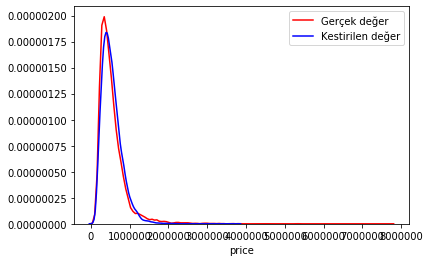

In [ ]:
y = data['price']
x = data[['sqft_living']]
lr.fit(x,y)
y_kestirilen = lr.predict(x)
ax1 = sns.distplot(data['price'],hist=False,color='r',label='Gerçek değer')
sns.distplot(y_kestirilen,hist=False,color='b',label='Kestirilen değer',ax=ax1)

Tüm özelliklerin dağılımı çizdirip hata doğasını inceleyelim.

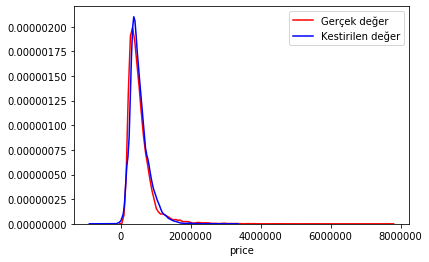

In [ ]:
y = data['price']
x = data[['sqft_living','grade','bathrooms','bedrooms']]
lr.fit(x,y)
y_kestirilen = lr.predict(x)
ax1 = sns.distplot(data['price'],hist=False,color='r',label='Gerçek değer')
sns.distplot(y_kestirilen,hist=False,color='b',label='Kestirilen değer',ax=ax1)

Birden fazla özellik kullanıldığında hata azaldı.

Konutları haritada göstermek için kordinat bilgilerini alalım.

Gerekli kütüphaneyi import ediyoruz.

In [ ]:
import folium

In [ ]:
loc = pd.read_csv('file:///C:/Users/Batuhan/Desktop/kc_house_data.csv')
loc = loc[['id','lat','long']]
loc

,id,lat,long
0,7129300520,47.5112,-122.257
1,6414100192,47.7210,-122.319
2,5631500400,47.7379,-122.233
3,2487200875,47.5208,-122.393
4,1954400510,47.6168,-122.045
...,...,...,...
21592,263000018,47.6993,-122.346
21593,6600060120,47.5107,-122.362
21594,1523300141,47.5944,-122.299
21595,291310100,47.5345,-122.069


Kordinat verilerimizi liste haline getirelim.

In [ ]:
locations = loc[['lat','long']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[7]

[47.4095, -122.315]

Şimdi haritamızı oluşturup konutları işaretliyoruz.(İşaretleme uzun sürdüğü için işaretleme yapılan satırı beklemeyelim diye kaldırdım.)

In [ ]:
location = loc['lat'].mean(),loc['long'].mean()
m = folium.Map(location=location,zoom_start=12)
#for point in range(0, len(locationlist)):
 #   folium.Marker(locationlist[point], popup=loc['id'][point]).add_to(m)
m